# <u>Implementation from Scratch</u>

<br />

I am going to implement algorithms by using the least kinds of libraries such as Numpy possible.

## [Task 1] Create a Class of Linear Regression from Scratch

<br />

I will create a class of linear regression and incorporate it to the pipeline of regressions on the "sprint2" directory.

#### Hypothesis Function

<br />

I implement the following hypothesis function of linear regression.

$$
h_\theta(x) = \theta_0 x_0 + \theta_1 x_1 + \cdots + \theta_j x_j + \theta_n x_n \ \ \ (x_0=1)
$$

$x$: feature vector

$\theta$: parameter vector

$n$: the number of features

$x_j$: jth feature vector

$\theta_j$: jth parameter(weight) vector

I will implement the hypothesis function that can apply to any $n$, the number of features.

<br />

In addition, the following equation is the vector format.

$$
h_\theta(x) = \theta^T x
$$

#### Objective Function

<br />


I will implement the following objective function of linear regression. This is the MSE, mean square error divided by 2 to use the steepest descent method easily.

$$
J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2
$$

$m$: the number of data input

$h_\theta()$: hypothesis function

$x^{(i)}$: feature vector of ith sample

$y^{(i)}$: correct values of ith sample

#### Steepest Descent Method

<br />

I will fit datasets by steepest descent method. The following equation is to update the jth parameter.

$$
\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^m[(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}]
$$

$\alpha$: learning rate

$i$: index of a sample

$j$: index of a feature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Create a class of linear regression from scratch

class ScratchLinearRegression():
    """
    Implementation of linear regression from scratch
    
    Parameters
    ----------
    num_iter: int
        The number of iteration
    
    lr: float
        Learning rate
    
    no_bias: bool
        True if not input the bias term
    
    verbose: bool
        True if output the learning process
    
    
    Attributes
    ----------
    self.coef_: ndarray whose shape is (n_features,)
        parameters
    
    self.loss: ndarray whose shape is (self.iter,)
        records of loss on train dataset
    
    self.val_loss: ndarray whose shape is (self.iter,)
        records of loss on validation dataset
    """
    
    def __init__(self, num_iter, lr, bias, verbose):
        # Record hyperparameters as attribute
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        
        # Prepare arrays for recording loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Fit linear regression. In a case of inputting validation dataset, return loss and accuracy of 
        the data per iteration.
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Features of train dataset
        
        y: ndarray whose shape is (n_samples,)
            Correct values of train dataset
        
        X_val: ndarray whose shape is (n_samples,n_features)
            Features of validation dataset
        
        y_val: ndarray whose shape is (n_samples,)
            Correct values of validation dataset
        """
        
        ###print("fit-1, X=",X.shape)   # (1168,2)
        ###print("fit-2, y=",y.shape)   # (1168,)
        ###print("fit-101, X_val=",X_val.shape)   # (292,2)
        ###print("fit-102, y_val=",y_val.shape)   # (292,)
        
        # Change the vectors to a matrix
        y = y.reshape(len(y), 1)
        if y_val is not None:
            y_val = y_val.reshape(len(y_val), 1)
        
        # Add a bias if self.bias is True
        if self.bias == True:
            # Create arrays of biases
            X_bias = np.array([1 for _ in range(X.shape[1])])
            y_bias = np.array([1 for _ in range(y.shape[1])])
            ###print("fit-3, X_bias=",X_bias.shape)   # (1168,)
            ###print("fit-4, y_bias=",y_bias.shape)   # (1168,)
            # Add the biases
            X = np.vstack((X_bias, X))
            y = np.vstack((y_bias, y))
        
        # Transform dataframes to move their features to rows
        X = X.T
        y = y.T
        if (X_val is not None) and (y_val is not None):
            X_val = X_val.T
            y_val = y_val.T
        
        ###print("fit-5, X=",X.shape)   # (2,1168)
        ###print("fit-6, y=",y.shape)   # (1,1168)
        ###if (X_val is not None) and (y_val is not None):
            ###print("fit-103, X_val=",X_val.shape)   # (2,292)
            ###print("fit-104, y_val=",y_val.shape)   # (1,292)
        
        # Set a hypothesis parameter randomly and transform it
        self.coef_ = np.random.randn(X.shape[0])
        self.coef_ = self.coef_.reshape(len(self.coef_),1)
        ###print("fit-7, self.coef_=",self.coef_.shape)   # (2,1)
        
        # Update the theta and get loss of train dataset
        for i in range(self.iter):
            # Update the parameter
            self.coef_ = self._gradient_descent(X, y)
            ###print("fit-8, self.coef_=",self.coef_.shape)   # (2,1)
            # Compute the mean square mean
            mse = self._compute_cost(X, y)
            ###print("fit-9, mse=",mse.shape)   # ()
            # Record the errors
            self.loss[i] = mse
            # Return the loss if verbose is True
            if self.verbose:
                print(self.loss[i])
            
            # Get loss of validation datasets
            if (X_val is not None) and (y_val is not None):
                # Get the mean square error
                val_mse = self._compute_cost(X_val, y_val)
                # Record the errors
                self.val_loss[i] = val_mse
                # Return the loss if verbose is True
                if self.verbose:
                    print(self.val_loss[i])
    
    
    def predict(self, X):
        """
        Predict by using linear regression
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Samples
        
        
        Returns
        ----------
        ndarray whose shape is (n_samples,1)
            Results of the prediction by using linear regression
        """
        
        if self.bias == True:
            X_bias = np.array([1 for _ in range(X.shape[1])])
            X = np.vstack((X_bias, X))
        
        ###print("predict-1, self.coef_=",self.coef_.shape)
        ###print("predict-2, X=",X.shape)
        
        # Predict train dataset
        y_pred = np.dot(self.coef_.T, X.T)   # (1,2) * (2,293)
        
        return y_pred
    
    
    # Create a definition of hypothesis function of lunear regression
    def _linear_hypothesis(self, X):
        """
        Return hypothesis function of linear regression
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Train dataset
        
        Returns
        ----------
        ndarray whose shape is (n_samples,1)
            Results of the prediction by hypothesis function of linear regression
        """
        
        # Compute the hypothesis function
        y_pred = np.dot(self.coef_.T, X)   # (1,2) * (2,1168)
        ###print("_linear_hypothesis-1, y_pred=",y_pred.shape)   # (1,1168)
         
        return y_pred
    
    
    # Create a definition to compute the mean square error
    def _compute_cost(self, X, y):
        """
        Compute the mean square error. Import the "MSE" definition.

        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            train dataset

        y: ndarray whose shape is (n_samples,1)
            correct value


        Returns
        ----------
        ndarray whose shape is (1,)
            mean square error
        """

        y_pred = self._linear_hypothesis(X)
    
        return self.MSE(y_pred, y)
    
    
    # Create a definition of the mean square error
    def MSE(self, y_pred, y):
        """
        Return the mean square error
        
        Parameters
        ----------
        y_pred: ndarray whose shape is (n_samples,)
            predited value
        
        y: ndarray whose shape is (n_samples,)
            correct value
        
        
        Returns
        ----------
        mse: numpy.float
            mean square error
        """
        
        # Compute an error
        error = y_pred - y
        ###print("MSE-1, error=",error.shape)   # (1,1168)
        
        # Sum errors
        sum_errors = np.sum(error**2)
        
        # Return the mean square error devided by 2
        return sum_errors / (2*y.shape[1])
    
    
    # Create a definition to fit datasets by steepest descent method
    def _gradient_descent(self, X, y):
        """
        Fit datasets by steepest descent method
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            train dataset
        
        y: ndarray whose shape is (n_samples,1)
            correct value
        
        
        Returns
        ----------
        ndarray whose shape is (1,)
            parameter(weight)
        """
        
        # Predict train dataset
        y_pred = np.dot(self.coef_.T, X)   # (1,2) * (2,1168)
        ###print("_gradient_decsent-1, y_pred=",y_pred.shape)  # (1,1168)
        
        ###print("_gradient_decsent-1, y=",y.shape)   # (1,1168)
        
        # Compute the error and the mean square error
        error = y_pred - y   # (1,1168)
        ###print("_gradient_decsent-2, error=",error.shape)   # (1,1168)
        
        # Compute the gradient
        grad = np.dot(X, error.T)   # (2,1168) * (1168,1)
        ###print("_gradient_decsent-3, grad=",grad.shape)   # (2,1)
        
        # Update the parameter
        return self.coef_ - self.lr*grad/y.shape[1]
    
    
    # Plot learning records
    def plot_learning_record(self):
        plt.plot(self.loss, label="loss")
        plt.plot(self.val_loss, label="val_loss")
        
        plt.title("Learning Records")
        plt.xlabel("Number of Iterrations")
        plt.ylabel("Loss")
        plt.grid(True)
        
        plt.legend()
        plt.show()

### Validate the Class

<br />

I am going to validate the class by using the "House Prices: Advanced Regression Techniques" datasets on Kaggle.

In [3]:
# Prepare a dataset for the validation

# Import the dataset
train = pd.read_csv('"House Prices- Advanced Regression Techniques".train.csv')
test = pd.read_csv('"House Prices- Advanced Regression Techniques".test.csv')

# Split the datasets into explanatory and objective variables
X = train.loc[:,["GrLivArea", "YearBuilt"]].values
y = train.SalePrice.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Xy = pd.concat([X,y], axis=1)

#df = Xy[Xy.Species!=0]

# create and save a csv file of the dataframe
#df.to_csv('iris_dataset.csv')

In [4]:
# Standardize the dataset

# Initialize the class
scaler = StandardScaler()

# Fit the dataset
scaler.fit(X_train)

# Transfer the datasets
std_X_train = scaler.transform(X_train)

# Fit the dataset
scaler.fit(X_test)

# Transfer the datasets
std_X_test = scaler.transform(X_test)

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarni

In [5]:
# Initialize the class

slr = ScratchLinearRegression(num_iter=10000, lr=0.0001, bias=True, verbose=True)

In [6]:
slr.fit(std_X_train, y_train, std_X_test, y_test)

19425620414.5681
19826336421.67564
19425173570.431698
19825784791.0877
19424726830.364014
19825233283.356216
19424280194.340763
19824681898.45315
19423833662.33767
19824130636.35047
19423387234.330463
19823579497.02016
19422940910.294884
19823028480.43419
19422494690.206673
19822477586.56455
19422048574.04157
19821926815.38324
19421602561.775333
19821376166.862263
19421156653.383717
19820825640.97362
19420710848.84249
19820275237.68934
19420265148.12742
19819724956.98143
19419819551.214275
19819174798.82192
19419374058.07885
19818624763.18285
19418928668.696922
19818074850.036255
19418483383.04428
19817525059.354183
19418038201.096733
19816975391.10869
19417593122.83008
19816425845.271835
19417148148.22012
19815876421.815685
19416703277.242683
19815327120.712307
19416258509.873577
19814777941.933792
19415813846.08863
19814228885.452217
19415369285.863686
19813679951.23967
19414924829.17457
19813131139.26826
19414480475.99713
19812582449.51009
19414036226.30721
19812033881.937267
194135

19582627347.82173
19228270247.95426
19582129925.892178
19227869361.602764
19581632614.456448
19227468568.59778
19581135413.489357
19227067868.917534
19580638322.965733
19226667262.540253
19580141342.8604
19226266749.444168
19579644473.1482
19225866329.607525
19579147713.80397
19225466003.008556
19578651064.802567
19225065769.625526
19578154526.11883
19224665629.436672
19577658097.727642
19224265582.42027
19577161779.603848
19223865628.554565
19576665571.72233
19223465767.81784
19576169474.057957
19223066000.18837
19575673486.58562
19222666325.64442
19575177609.2802
19222266744.16429
19574681842.1166
19221867255.72626
19574186185.069717
19221467860.30863
19573690638.114456
19221068557.8897
19573195201.22573
19220669348.44777
19572699874.37846
19220270231.961147
19572204657.54756
19219871208.408154
19571709550.707966
19219472277.767105
19571214553.83462
19219073440.016327
19570719666.90245
19218674695.13415
19570224889.886414
19218276043.098907
19569730222.76146
19217877483.888943
195692

19070762274.66931
19386306001.749226
19070398060.82125
19385852137.629353
19070033931.764984
19385398374.082996
19069669887.480732
19384944711.087254
19069305927.948727
19384491148.619255
19068942053.14919
19384037686.6561
19068578263.062366
19383584325.17493
19068214557.668488
19383131064.152874
19067850936.947803
19382677903.56706
19067487400.88056
19382224843.394634
19067123949.44702
19381771883.61274
19066760582.627434
19381319024.198536
19066397300.402065
19380866265.129173
19066034102.751183
19380413606.381817
19065670989.65506
19379961047.93363
19065307961.093975
19379508589.76179
19064945017.048206
19379056231.843475
19064582157.498043
19378603974.15587
19064219382.42377
19378151816.676155
19063856691.80569
19377699759.38153
19063494085.624096
19377247802.2492
19063131563.859306
19376795945.256355
19062769126.49161
19376344188.38022
19062406773.501343
19375892531.597996
19062044504.868805
19375440974.88691
19061682320.574326
19374989518.224194
19061320220.598236
19374538161.587

19217124773.69893
18934961025.48144
19216708355.518723
18934628424.46285
19216292029.394623
18934295900.862568
19215875795.305706
18933963454.66255
19215459653.231056
18933631085.844738
19215043603.149754
18933298794.391083
19214627645.04089
18932966580.283543
19214211778.883556
18932634443.504078
19213796004.656853
18932302384.034657
19213380322.339878
18931970401.857243
19212964731.911755
18931638496.95381
19212549233.351578
18931306669.306343
19212133826.638477
18930974918.896816
19211718511.75158
18930643245.707214
19211303288.67
18930311649.71954
19210888157.37287
18929980130.91577
19210473117.83934
18929648689.277916
19210058170.04855
18929317324.78798
19209643313.97964
18928986037.42796
19209228549.611767
18928654827.179874
19208813876.924084
18928323694.02574
19208399295.89575
18927992637.947567
19207984806.50593
18927661658.92739
19207570408.733807
18927330756.94724
19207156102.55855
18926999931.989132
19206741887.95934
18926669184.035114
19206327764.91536
18926338513.067226
1

19054639653.59219
18805489519.390804
19054259109.894356
18805187052.16526
19053878650.1035
18804884655.330444
19053498274.200584
18804582328.869953
19053117982.16655
18804280072.76737
19052737773.98238
18803977887.006283
19052357649.629032
18803675771.570297
19051977609.087475
18803373726.443016
19051597652.33869
18803071751.60804
19051217779.363647
18802769847.048965
19050837990.143345
18802468012.74942
19050458284.65876
18802166248.69301
19050078662.890892
18801864554.86336
19049699124.820732
18801562931.24409
19049319670.429287
18801261377.818836
19048940299.69756
18800959894.57122
19048561012.606567
18800658481.484875
19048181809.13732
18800357138.543453
19047802689.270836
18800055865.730587
19047423652.98814
18799754663.029915
19047044700.27026
18799453530.425102
19046665831.098232
18799152467.899796
19046287045.453083
18798851475.437653
19045908343.315865
18798550553.022343
19045529724.667618
18798249700.637516
19045151189.48939
18797948918.266853
19044772737.76225
18797648205.89

18687197055.421185
18905092041.931583
18686922114.785473
18904744428.496147
18686647238.121838
18904396891.498028
18686372425.41537
18904049430.919895
18686097676.65115
18903702046.74442
18685822991.814278
18903354738.95429
18685548370.88983
18903007507.532185
18685273813.86293
18902660352.460815
18684999320.718655
18902313273.72285
18684724891.442123
18901966271.301006
18684450526.018444
18901619345.177982
18684176224.43272
18901272495.33647
18683901986.67008
18900925721.7592
18683627812.71563
18900579024.42888
18683353702.554497
18900232403.32822
18683079656.171806
18899885858.439957
18682805673.552692
18899539389.746803
18682531754.68228
18899192997.23149
18682257899.54571
18898846680.876766
18681984108.12812
18898500440.66535
18681710380.414658
18898154276.58001
18681436716.39046
18897808188.603462
18681163116.04069
18897462176.718475
18680889579.350494
18897116240.9078
18680616106.305027
18896770381.15419
18680342696.88945
18896424597.440414
18680069351.088932
18896078889.74923
18

18578919416.733875
18767833563.656788
18578669667.19088
18767516090.231358
18578419975.746742
18767198686.416725
18578170342.387917
18766881352.19713
18577920767.10086
18766564087.556824
18577671249.872044
18766246892.48007
18577421790.68792
18765929766.951107
18577172389.534966
18765612710.954212
18576923046.399647
18765295724.473644
18576673761.26844
18764978807.493668
18576424534.127823
18764661959.998554
18576175364.96428
18764345181.972584
18575926253.76429
18764028473.40003
18575677200.51434
18763711834.26518
18575428205.20092
18763395264.552315
18575179267.810524
18763078764.245724
18574930388.329655
18762762333.3297
18574681566.744804
18762445971.788548
18574432803.042477
18762129679.60656
18574184097.20918
18761813456.76804
18573935449.231422
18761497303.257305
18573686859.095715
18761181219.058655
18573438326.788574
18760865204.156403
18573189852.29652
18760549258.534878
18572941435.606075
18760233382.1784
18572693076.703754
18759917575.07128
18572444775.5761
18759601837.1978

18476034216.41491
18636671578.905518
18475808398.32997
18636382821.036537
18475582632.76519
18636094126.284912
18475356919.708332
18635805494.636383
18475131259.147156
18635516926.076687
18474905651.069416
18635228420.591576
18474680095.46289
18634939978.166798
18474454592.315346
18634651598.78811
18474229141.614555
18634363282.441257
18474003743.34829
18634075029.112007
18473778397.504326
18633786838.786118
18473553104.07045
18633498711.449364
18473327863.034443
18633210647.087498
18473102674.38409
18632922645.686317
18472877538.10719
18632634707.231567
18472652454.191525
18632346831.70905
18472427422.624886
18632059019.104538
18472202443.395084
18631771269.40382
18471977516.48991
18631483582.592678
18471752641.897175
18631195958.656918
18471527819.604675
18630908397.582317
18471303049.60023
18630620899.354694
18471078331.871647
18630333463.95983
18470853666.40674
18630046091.38355
18470629053.19333
18629758781.61164
18470404492.219234
18629471534.629932
18470179983.47228
18629184350.

18386485052.601055
18521830680.100212
18386280059.4081
18521566986.232162
18386075113.881542
18521303349.82332
18385870216.010284
18521039770.860714
18385665365.783207
18520776249.331394
18385460563.189217
18520512785.222397
18385255808.2172
18520249378.52078
18385051100.856075
18519986029.213585
18384846441.094734
18519722737.287884
18384641828.922092
18519459502.73072
18384437264.32705
18519196325.529156
18384232747.29852
18518933205.67026
18384028277.825417
18518670143.141098
18383823855.896664
18518407137.92874
18383619481.501175
18518144190.020256
18383415154.627872
18517881299.40272
18383210875.265686
18517618466.063217
18383006643.403538
18517355689.988823
18382802459.03036
18517092971.166626
18382598322.135086
18516830309.58371
18382394232.706642
18516567705.22717
18382190190.733974
18516305158.08409
18381986196.206024
18516042668.141582
18381782249.111732
18515780235.38673
18381578349.440044
18515517859.80664
18381374497.179905
18515255541.388424
18381170692.320267
18514993280

18304449134.10671
18415979933.507973
18304263214.3585
18415739267.779884
18304077337.831863
18415498654.321453
18303891504.51672
18415258093.120907
18303705714.403
18415017584.166485
18303519967.48064
18414777127.446423
18303334263.73957
18414536722.94896
18303148603.169735
18414296370.66234
18302962985.761074
18414056070.574802
18302777411.50352
18413815822.6746
18302591880.38703
18413575626.94998
18302406392.40155
18413335483.389202
18302220947.53703
18413095391.98051
18302035545.783417
18412855352.712173
18301850187.130665
18412615365.572445
18301664871.568733
18412375430.5496
18301479599.087578
18412135547.631897
18301294369.67717
18411895716.8076
18301109183.327457
18411655938.064987
18300924040.028423
18411416211.392338
18300738939.770023
18411176536.777927
18300553882.542236
18410936914.210026
18300368868.33503
18410697343.67692
18300183897.138386
18410457825.166904
18299998968.942276
18410218358.66826
18299814083.73668
18409978944.169273
18299629241.511585
18409739581.65825
182

18314754583.5306
18226344672.170082
18314535864.327637
18226176907.53999
18314317192.457775
18226009181.901333
18314098567.910366
18225841495.24504
18313879990.67479
18225673847.56203
18313661460.740402
18225506238.843216
18313442978.096584
18225338669.07952
18313224542.732708
18225171138.261875
18313006154.63814
18225003646.381203
18312787813.802277
18224836193.428425
18312569520.21448
18224668779.39448
18312351273.86415
18224501404.2703
18312133074.740658
18224334068.04682
18311914922.8334
18224166770.714977
18311696818.131763
18223999512.26571
18311478760.625145
18223832292.689953
18311260750.302933
18223665111.97866
18311042787.15453
18223497970.122776
18310824871.169342
18223330867.11324
18310607002.33676
18223163802.941
18310389180.646202
18222996777.597023
18310171406.087063
18222829791.072254
18309953678.648758
18222662843.35765
18309735998.320705
18222495934.444168
18309518365.09231
18222329064.322765
18309300778.953003
18222162232.98441
18309083239.892185
18221995440.420063
1

18225133851.45572
18157837484.15299
18224934492.77539
18157685639.900703
18224735177.08188
18157533830.93108
18224535904.365547
18157382057.235905
18224336674.616768
18157230318.806965
18224137487.82589
18157078615.636032
18223938343.983284
18156926947.71491
18223739243.07933
18156775315.03537
18223540185.104378
18156623717.58921
18223341170.048813
18156472155.368237
18223142197.90301
18156320628.364223
18222943268.65735
18156169136.56898
18222744382.302204
18156017679.974304
18222545538.827965
18155866258.57199
18222346738.225
18155714872.353844
18222147980.48371
18155563521.311672
18221949265.59447
18155412205.43728
18221750593.547684
18155260924.722473
18221551964.33374
18155109679.159065
18221353377.943035
18154958468.73886
18221154834.365955
18154807293.45368
18220956333.592915
18154656153.29534
18220757875.614307
18154505048.255657
18220559460.420536
18154353978.326447
18220361088.002014
18154202943.499535
18220162758.349136
18154051943.766747
18219964471.452324
18153900979.1199


18097344611.588867
18145252359.905483
18097206821.8373
18145070194.7304
18097069064.09486
18144888068.690117
18096931338.354095
18144705981.77586
18096793644.60755
18144523933.97888
18096655982.84778
18144341925.29042
18096518353.06733
18144159955.701733
18096380755.25875
18143978025.20406
18096243189.414597
18143796133.788662
18096105655.52743
18143614281.446785
18095968153.5898
18143432468.16969
18095830683.59427
18143250693.94863
18095693245.533394
18143068958.77486
18095555839.399746
18142887262.639656
18095418465.185886
18142705605.534267
18095281122.884377
18142523987.449966
18095143812.487785
18142342408.378017
18095006533.988686
18142160868.309692
18094869287.379646
18141979367.236263
18094732072.653244
18141797905.149
18094594889.802048
18141616482.03918
18094457738.818634
18141435097.898075
18094320619.695587
18141253752.716976
18094183532.425484
18141072446.487156
18094046477.000904
18140891179.1999
18093909453.414433
18140709950.8465
18093772461.658657
18140528761.41823
180

18041825328.18965
18071582270.164692
18041700434.19743
18071415901.772633
18041575569.21123
18071249568.983635
18041450733.224297
18071083271.789753
18041325926.229885
18070917010.183037
18041201148.22123
18070750784.15554
18041076399.19158
18070584593.699318
18040951679.134212
18070418438.80642
18040826988.04236
18070252319.46891
18040702325.90928
18070086235.678844
18040577692.728233
18069920187.42829
18040453088.492477
18069754174.709305
18040328513.19527
18069588197.513958
18040203966.829876
18069422255.834312
18040079449.389557
18069256349.662437
18039954960.867577
18069090478.99041
18039830501.257206
18068924643.81029
18039706070.55171
18068758844.114166
18039581668.74435
18068593079.894108
18039457295.82841
18068427351.142193
18039332951.797157
18068261657.850502
18039208636.643867
18068096000.011112
18039084350.36181
18067930377.616116
18038960092.944267
18067764790.65759
18038835864.384518
18067599239.12762
18038711664.675846
18067433723.018307
18038587493.811523
18067268242.3

17990370581.108944
18002770375.1334
17990257635.671364
18002618703.035007
17990144716.457798
18002467063.261272
17990031823.462147
18002315455.804985
17989918956.6783
18002163880.65895
17989806116.100147
18002012337.81597
17989693301.7216
18001860827.26884
17989580513.536556
18001709349.01037
17989467751.538918
18001557903.033363
17989355015.722588
18001406489.330635
17989242306.08147
18001255107.894978
17989129622.60947
18001103758.719223
17989016965.300495
18000952441.796165
17988904334.148457
18000801157.118626
17988791729.147263
18000649904.679424
17988679150.29083
18000498684.47137
17988566597.57306
18000347496.48729
17988454070.987885
18000196340.719997
17988341570.529205
18000045217.162315
17988229096.19095
17999894125.807068
17988116647.967026
17999743066.64709
17988004225.85136
17999592039.675198
17987891829.837887
17999441044.884224
17987779459.920506
17999290082.267
17987667116.09316
17999139151.816353
17987554798.349766
17998988253.52512
17987442506.684254
17998837387.38613

17944042224.847244
17940301910.269363
17943940034.63047
17940163523.93847
17943837868.134037
17940025166.975395
17943735725.352425
17939886839.373615
17943633606.280106
17939748541.1266
17943531510.91157
17939610272.227825
17943429439.2413
17939472032.67077
17943327391.263775
17939333822.44891
17943225366.973476
17939195641.555725
17943123366.364902
17939057489.984695
17943021389.43253
17938919367.72931
17942919436.170853
17938781274.78304
17942817506.574364
17938643211.13938
17942715600.63755
17938505176.791817
17942613718.354904
17938367171.733837
17942511859.72093
17938229195.95893
17942410024.73011
17938091249.46059
17942308213.376945
17937953332.2323
17942206425.655937
17937815444.267567
17942104661.561584
17937677585.55988
17942002921.08838
17937539756.102737
17941901204.230835
17937401955.889633
17941799510.98345
17937264184.914078
17941697841.34073
17937126443.169567
17941596195.297184
17936988730.649605
17941494572.847305
17936851047.347694
17941392973.98562
17936713393.257343

17902402428.318977
17883673439.983353
17902309902.190994
17883547045.4065
17902217397.53413
17883420677.535103
17902124914.34338
17883294336.363235
17902032452.613754
17883168021.88497
17901940012.340252
17883041734.094402
17901847593.517883
17882915472.985607
17901755196.141663
17882789238.552666
17901662820.206585
17882663030.789673
17901570465.707676
17882536849.6907
17901478132.63994
17882410695.249847
17901385820.998383
17882284567.461197
17901293530.778027
17882158466.318848
17901201261.97388
17882032391.816883
17901109014.58097
17881906343.949406
17901016788.594307
17881780322.710495
17900924584.008907
17881654328.09426
17900832400.819798
17881528360.0948
17900740239.021996
17881402418.706203
17900648098.61052
17881276503.922577
17900555979.58039
17881150615.738014
17900463881.92664
17881024754.146626
17900371805.644295
17880898919.142513
17900279750.728367
17880773110.719788
17900187717.173904
17880647328.872543
17900095704.97592
17880521573.594894
17900003714.12945
17880395844

17864616194.363426
17831826349.689613
17864532435.471703
17831710885.30733
17864448696.01102
17831595445.209934
17864364975.97685
17831480029.392067
17864281275.36468
17831364637.848347
17864197594.16999
17831249270.573418
17864113932.388256
17831133927.561897
17864030290.014965
17831018608.808434
17863946667.045605
17830903314.30765
17863863063.475655
17830788044.05419
17863779479.300606
17830672798.042694
17863695914.51594
17830557576.26779
17863612369.117153
17830442378.724133
17863528843.099728
17830327205.40635
17863445336.45916
17830212056.309093
17863361849.190937
17830096931.427
17863278381.290558
17829981830.75472
17863194932.75351
17829866754.2869
17863111503.575287
17829751702.018177
17863028093.75139
17829636673.94321
17862944703.277313
17829521670.05665
17862861332.14856
17829406690.35314
17862777980.36062
17829291734.827343
17862694647.908997
17829176803.4739
17862611334.789196
17829061896.287476
17862528040.99671
17828947013.262714
17862444766.527058
17828832154.39429
17

17830106685.044086
17784031150.75655
17830030930.767765
17783925715.409203
17829955194.06026
17783820302.13164
17829879474.917477
17783714910.919006
17829803773.335335
17783609541.766422
17829728089.309742
17783504194.669025
17829652422.836624
17783398869.621956
17829576773.911892
17783293566.620346
17829501142.53146
17783188285.65934
17829425528.691257
17783083026.73407
17829349932.38719
17782977789.83968
17829274353.61519
17782872574.971306
17829198792.371178
17782767382.124096
17829123248.65107
17782662211.29319
17829047722.450798
17782557062.47373
17828972213.766285
17782451935.66087
17828896722.59345
17782346830.849747
17828821248.928223
17782241748.035515
17828745792.766533
17782136687.21332
17828670354.104305
17782031648.37832
17828594932.937477
17781926631.52565
17828519529.26197
17781821636.65047
17828444143.073715
17781716663.74794
17828368774.368652
17781611712.813206
17828293423.14271
17781506783.841427
17828218089.39182
17781401876.82776
17828142773.111916
17781296991.7673

17740859847.24685
17799168919.92285
17740763426.958824
17799100339.616848
17740667026.754944
17799031775.211033
17740570646.63078
17798963226.701714
17740474286.581936
17798894694.085197
17740377946.603977
17798826177.357773
17740281626.692505
17798757676.51576
17740185326.843086
17798689191.555454
17740089047.05134
17798620722.473164
17739992787.31282
17798552269.2652
17739896547.62314
17798483831.927868
17739800327.97788
17798415410.45748
17739704128.372635
17798347004.850346
17739607948.802994
17798278615.10277
17739511789.264557
17798210241.21107
17739415649.752914
17798141883.17156
17739319530.263664
17798073540.980545
17739223430.7924
17798005214.634342
17739127351.33473
17797936904.129272
17739031291.88623
17797868609.46165
17738935252.44252
17797800330.62779
17738839232.99919
17797732067.624
17738743233.551853
17797663820.446613
17738647254.096096
17797595589.09194
17738551294.62754
17797527373.556313
17738455355.141777
17797459173.836033
17738359435.63442
17797390989.92744
177

17770540328.414345
17700313871.334633
17770478384.545525
17700225875.21156
17770416455.03365
17700137897.32252
17770354539.87538
17700049937.66352
17770292639.067383
17699961996.23055
17770230752.60632
17699874073.01963
17770168880.488857
17699786168.026756
17770107022.71165
17699698281.247932
17770045179.271378
17699610412.67917
17769983350.164696
17699522562.316475
17769921535.38828
17699434730.15584
17769859734.938793
17699346916.193302
17769797948.812904
17699259120.42485
17769736177.007286
17699171342.8465
17769674419.518604
17699083583.45427
17769612676.343533
17698995842.244156
17769550947.478745
17698908119.212193
17769489232.92091
17698820414.354378
17769427532.666702
17698732727.666733
17769365846.712803
17698645059.145275
17769304175.055874
17698557408.78602
17769242517.6926
17698469776.584984
17769180874.61965
17698382162.53819
17769119245.833717
17698294566.641655
17769057631.331467
17698206988.891396
17768996031.10958
17698119429.28344
17768934445.164738
17698031887.81381

17663221260.06109
17744513859.61051
17663140929.754143
17744457947.00972
17663060616.002857
17744402047.363693
17662980318.803596
17744346160.669403
17662900038.152756
17744290286.923855
17662819774.046715
17744234426.124023
17662739526.48186
17744178578.266907
17662659295.454567
17744122743.349503
17662579080.96123
17744066921.36879
17662498882.99823
17744011112.321777
17662418701.56196
17743955316.205437
17662338536.648796
17743899533.01678
17662258388.255142
17743843762.7528
17662178256.37737
17743788005.41049
17662098141.011883
17743732260.98684
17662018042.155067
17743676529.478855
17661937959.803318
17743620810.883526
17661857893.95302
17743565105.197857
17661777844.600574
17743509412.418846
17661697811.74237
17743453732.543495
17661617795.374805
17743398065.568798
17661537795.494274
17743342411.491764
17661457812.097176
17743286770.309387
17661377845.17991
17743231142.018673
17661297894.73886
17743175526.616627
17661217960.77044
17743119924.10025
17661138043.27105
17743064334.46

17721982266.60169
17630601269.08311
17721931573.660297
17630527643.91202
17721880892.46045
17630454033.83317
17721830222.999413
17630380438.84327
17721779565.274464
17630306858.93902
17721728919.282875
17630233294.117134
17721678285.021915
17630159744.374336
17721627662.488865
17630086209.70734
17721577051.680992
17630012690.112858
17721526452.595573
17629939185.587605
17721475865.22989
17629865696.128292
17721425289.58121
17629792221.73164
17721374725.646812
17629718762.39437
17721324173.42398
17629645318.1132
17721273632.909985
17629571888.884853
17721223104.10211
17629498474.70604
17721172586.997627
17629425075.573498
17721122081.59383
17629351691.48393
17721071587.88799
17629278322.434067
17721021105.877384
17629204968.42063
17720970635.559307
17629131629.440346
17720920176.931034
17629058305.48994
17720869729.98985
17628984996.56614
17720819294.733036
17628911702.66566
17720768871.15788
17628838423.785236
17720718459.26166
17628765159.9216
17720668059.041676
17628691911.071472
177

17701186363.376015
17600224795.659683
17701140486.395412
17600157380.092194
17701094620.03724
17600089978.26607
17701048764.29903
17600022590.178318
17701002919.178318
17599955215.82596
17700957084.67263
17599887855.20601
17700911260.77951
17599820508.315483
17700865447.496483
17599753175.1514
17700819644.821095
17599685855.71079
17700773852.750874
17599618549.990654
17700728071.283348
17599551257.988026
17700682300.41607
17599483979.69992
17700636540.14656
17599416715.123367
17700590790.472374
17599349464.25538
17700545051.391033
17599282227.09298
17700499322.900085
17599215003.633205
17700453604.99707
17599147793.873066
17700407897.679527
17599080597.80959
17700362200.944992
17599013415.439816
17700316514.79101
17598946246.760754
17700270839.215122
17598879091.769436
17700225174.214874
17598811950.46289
17700179519.787804
17598744822.83815
17700133875.931454
17598677708.89224
17700088242.64337
17598610608.622185
17700042619.9211
17598543522.025024
17699997007.762184
17598476449.09778

In [7]:
slr.predict(std_X_test)

array([[ 5.50922331e+04, -3.21363370e+04,  8.80718285e+04,
        -6.37457313e+04, -8.62492149e+03,  3.72851730e+04,
        -5.16492784e+04,  2.64122753e+03,  3.75792928e+03,
        -5.32693674e+04, -1.87283685e+04, -3.54592020e+04,
        -3.99579144e+04, -6.54654847e+04,  2.96534779e+04,
         3.58985008e+04, -4.39084722e+04,  4.09745240e+04,
        -3.05276107e+04, -7.03951600e+04,  2.54165222e+04,
         7.98160640e+03,  3.62593721e+04,  2.68530266e+04,
        -4.58843676e+04,  1.92389918e+04,  1.81521330e+02,
         2.01506167e+04, -5.43406187e+04,  2.82056109e+04,
         2.00749104e+04, -6.54289311e+04,  6.01139986e+04,
         7.75841019e+04, -4.49052501e+04,  3.74542460e+04,
        -2.63549987e+04,  8.49197440e+03,  5.28930070e+04,
         8.10199099e+04, -4.91888892e+04, -4.90185832e+04,
         5.67400685e+04, -3.28769729e+04,  6.39194415e+04,
        -3.86520134e+04, -2.94855156e+04, -4.08726882e+04,
        -3.66212210e+04,  7.94629318e+04, -8.28171055e+0

# <u>Validation</u>

## [Task 2] Plot Learning Curve

<br />

I am going to create a definition of drawing a plot of learning curves to validate the "ScratchLinearRegression" class.

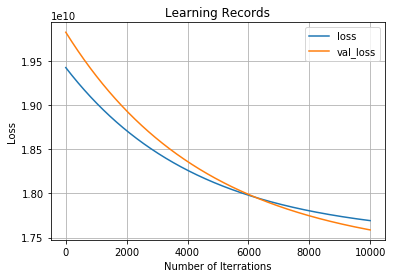

In [8]:
slr.plot_learning_record()

## [Task 3] Remove Terms of Biases

## [Task 4] Make Features Multi-dimentional

## [Task 5] Introduce an Equation for Updates

## [Task6] A Problem about Local Optimization

## [Task 7] What We Can Learn from Implementations from Scratch

    - We are not able to understand how algorithms of scikit-learn works without implementing those from scratch.
    
    - People who tried implementing scikit-learn from scratch are able to fulfill theirown responsibility for explaining why results they got are meaningful.
    
    - Also, We just can learn about high-quality programming. In this case, I definitely grasped structures of class.